<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/BankMkting_modeling_Standard_Scaler_Aug_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset preprocessing + modeling

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

In [537]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier  
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
from IPython.display import Image

from imblearn.over_sampling import SMOTE

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [538]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [539]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [540]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [541]:
data.shape

(41188, 21)

# Correlation coefficient
* The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. 
* The correlation coefficients between output variable y (the success of subscription) and the 20 explanatory variables are therefore given in the heatmap in order to validate the viability of the features to predict the performance of bank telemarketing.

* Correlation coefficient values =	
  * +.70 or higher	Very strong positive relationship
  * +.40 to +.69	Strong positive relationship
  * +.30 to +.39	Moderate positive relationship
  * +.20 to +.29	weak positive relationship
  * +.01 to +.19	No or negligible relationship
  * 0	            No relationship 
  * -.01 to -.19	No or negligible relationship
  * -.20 to -.29	weak negative relationship
  * -.30 to -.39	Moderate negative relationship
  * -.40 to -.69	Strong negative relationship
  * -.70 or higher Very strong negative relationship

In [542]:
#replacing no and yes by 0 and 1 for 'y' (deposit)
data['y'] = data['y'].replace(['no','yes'],[0,1])
data['y'].unique()

array([0, 1])

In [543]:
data.corr().T

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<Figure size 576x396 with 0 Axes>

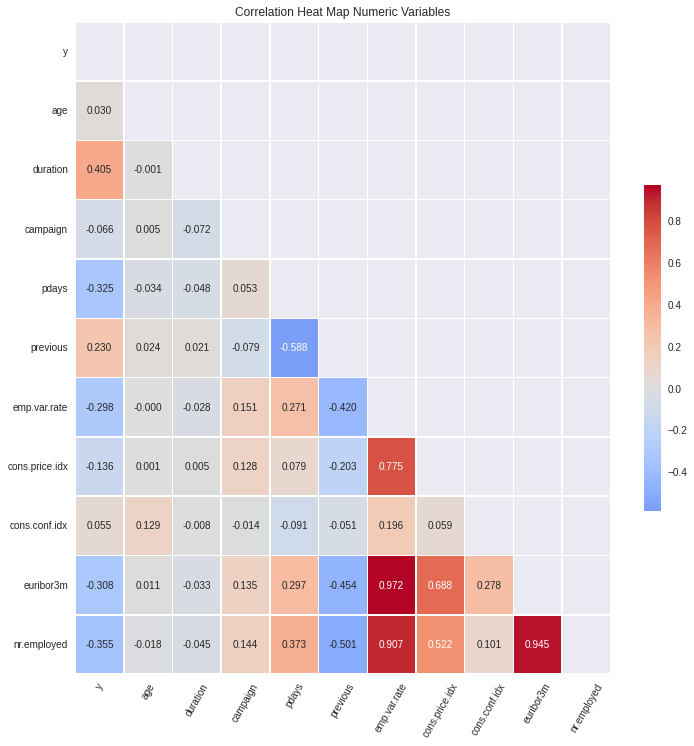

In [544]:
def heat_map_corr(map_corr): 
  corr=map_corr.corr()
  top = np.zeros_like(corr, dtype=np.bool)
  top[np.triu_indices_from(top)] = True 
  fig=plt.figure()
  fig, ax = plt.subplots(figsize=(12,12)) 
  sns.heatmap(corr, mask=top , cmap='coolwarm',
    center = 0,
    linewidths=.5, cbar_kws={'shrink':.5},
    annot = True, annot_kws={'size': 10}, fmt = '.3f')
  plt.xticks(rotation=60)
  plt.yticks(rotation=0)
  plt.title('Correlation Heat Map Numeric Variables')

corr_list = ['y', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']             
corr_list_test = data[corr_list]
heat_map_corr(map_corr=corr_list_test)

In [545]:
data['education'].value_counts()

data_1 = data.copy()
data_1 = data[data_1['education'] != 'illiterate']

data_1['edu_new'] = data_1['education'].map({'basic.4y': 'pre_high', 
                                         'basic.9y': 'pre_high',
                                         'basic.6y': 'pre_high',
                                         'university.degree' : 'post_high',
                                         'professional.course':'post_high',
                                         'high.school' : 'high',
                                         'unknown' :'unknown' })

In [546]:
def map_job(row):
    if row['job'] in ['admin.', 'management', 'entrepreneur','self-employed']:
        cat = 'white_collar'
    elif row['job'] in ['housemaid', 'blue-collar', 'technician', 'services']:
        cat = 'blue_collar'
    elif row['job'] in ['student', 'retired', 'unemployed']:
        cat = 'not_working'
    else:
        cat = 'unknown'
    return cat

data_1['job_new'] = data_1.apply(map_job, axis=1)
data_1['job_new'].value_counts(dropna = False)

blue_collar     21017
white_collar    16217
not_working      3606
unknown           330
Name: job_new, dtype: int64

In [547]:
def map_month(row):
    if row['month'] in ['mar', 'apr', 'may']:
        cat = 'spring'
    elif row['month'] in ['jun', 'jul', 'aug']:
        cat = 'summer'
    elif row['month'] in ['sep', 'oct', 'nov']:
        cat = 'fall'
    else:
        cat = 'winter'
    return cat

data_1['season'] = data_1.apply(map_month, axis=1)
data_1['season'].value_counts(dropna = False)

summer    18660
spring    16942
fall       5386
winter      182
Name: season, dtype: int64

In [548]:
data_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


### Data Transformation 
* keep all numerical features as they are
* consolidate categorical features (education, job, season) and drop originial ones

In [549]:
df_tran_1 = data_1[['age', 'marital', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'edu_new', 'job_new', 'season']]

## Dropping "duration"

In [550]:
df_tran_1 = df_tran_1.drop(['duration'], axis=1)
df_tran_1.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [551]:
print('Initial dataset:', data.shape)
print('Transformed dataset after grouping variables and dropping duration:', df_tran_1.shape)

Initial dataset: (41188, 21)
Transformed dataset after grouping variables and dropping duration: (41170, 20)


In [552]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [553]:
df_tran_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41170 non-null  int64  
 1   marital         41170 non-null  object 
 2   default         41170 non-null  object 
 3   housing         41170 non-null  object 
 4   loan            41170 non-null  object 
 5   contact         41170 non-null  object 
 6   day_of_week     41170 non-null  object 
 7   campaign        41170 non-null  int64  
 8   pdays           41170 non-null  int64  
 9   previous        41170 non-null  int64  
 10  poutcome        41170 non-null  object 
 11  emp.var.rate    41170 non-null  float64
 12  cons.price.idx  41170 non-null  float64
 13  cons.conf.idx   41170 non-null  float64
 14  euribor3m       41170 non-null  float64
 15  nr.employed     41170 non-null  float64
 16  y               41170 non-null  int64  
 17  edu_new         41170 non-null 

In [554]:
df_tran_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41170.0,40.020355,10.419647,17.000,32.000,38.000,47.000,98.000
campaign,41170.0,2.567719,2.770421,1.000,1.000,2.000,3.000,56.000
pdays,41170.0,962.483605,186.890849,0.000,999.000,999.000,999.000,999.000
previous,41170.0,0.172990,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41170.0,0.081980,1.570904,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41170.0,93.575777,0.578798,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41170.0,-40.502842,4.627973,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41170.0,3.621337,1.734444,0.634,1.344,4.857,4.961,5.045
nr.employed,41170.0,5167.033838,72.255836,4963.600,5099.100,5191.000,5228.100,5228.100
y,41170.0,0.112606,0.316115,0.000,0.000,0.000,0.000,1.000


In [555]:
TARGET = 'y'

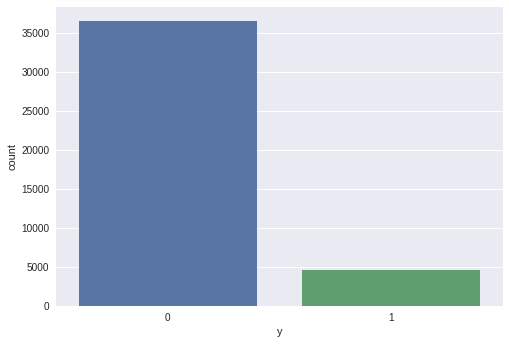

In [556]:
sns.countplot(x=TARGET,data=df_tran_1)

In [557]:
df_tran_1['y'].value_counts()

0    36534
1     4636
Name: y, dtype: int64

In [558]:
df_tran_1['y'].value_counts(normalize='True')

0    0.887394
1    0.112606
Name: y, dtype: float64

In [559]:
# # balancing the target counts

# d1=df_tran_1.copy()
# d2=d1[d1.y=='yes']
# d2
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# d1=pd.concat([d1, d2])
# df_tran_1=d1

In [560]:
# #replacing no and yes by 0 and 1 for 'y' (deposit)
# df_tran_1[TARGET] = df_tran_1[TARGET].replace(['no','yes'],[0,1])
# df_tran_1[TARGET].unique()

In [561]:
# displaying the data types and store into a variable
dt = df_tran_1.dtypes
dt

age                 int64
marital            object
default            object
housing            object
loan               object
contact            object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
edu_new            object
job_new            object
season             object
dtype: object

In [562]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [563]:
objList = []
intList = []
floatList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
  print(i)

OBJECTS
-------
marital
default
housing
loan
contact
day_of_week
poutcome
edu_new
job_new
season


INTEGERS
--------
age
campaign
pdays
previous


FLOATS
------
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [564]:
# so, look at the counts
# look for rare events, you want to throw away the variable with high cardinality (too many to use)
# ex. if 'divorced' is 90% get rid of it; 
# if 'divorced' is 30%, married 40%, single 20%, and the rest is everybody else, I want to use only those three.
# rare events are not my friends and also overly represented 
# take each variable and group data by that and print the counts

for i in objList:
    print(i)
    print(df_tran_1[i].unique())
    g = df_tran_1.groupby(i)
    print(g[i].count())
    print("-------")

marital
['married' 'single' 'divorced' 'unknown']
marital
divorced     4610
married     24913
single      11567
unknown        80
Name: marital, dtype: int64
-------
default
['no' 'unknown' 'yes']
default
no         32577
unknown     8590
yes            3
Name: default, dtype: int64
-------
housing
['no' 'yes' 'unknown']
housing
no         18614
unknown      990
yes        21566
Name: housing, dtype: int64
-------
loan
['no' 'yes' 'unknown']
loan
no         33935
unknown      990
yes         6245
Name: loan, dtype: int64
-------
contact
['telephone' 'cellular']
contact
cellular     26129
telephone    15041
Name: contact, dtype: int64
-------
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
day_of_week
fri    7823
mon    8513
thu    8617
tue    8085
wed    8132
Name: day_of_week, dtype: int64
-------
poutcome
['nonexistent' 'failure' 'success']
poutcome
failure         4251
nonexistent    35547
success         1372
Name: poutcome, dtype: int64
-------
edu_new
['pre_high' 'high' 'post_high' '

In [565]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


# One hot encoding

In [566]:
# using one hot encoding to transform the categorical variables into numeric variables
for i in objList :
    print('Class = ', i )
    thePrefix = 'z_' + i
    print( thePrefix )
    y = pd.get_dummies(df_tran_1[i], prefix = thePrefix, dummy_na = False) 
    print(type(y)) 
    print(y.head().T )
    df_tran_1 = pd.concat([df_tran_1, y], axis = 1 )
    df_tran_1 = df_tran_1.drop(i, axis = 1 )

Class =  marital
z_marital
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
z_marital_divorced  0  0  0  0  0
z_marital_married   1  1  1  1  1
z_marital_single    0  0  0  0  0
z_marital_unknown   0  0  0  0  0
Class =  default
z_default
<class 'pandas.core.frame.DataFrame'>
                   0  1  2  3  4
z_default_no       1  0  1  1  1
z_default_unknown  0  1  0  0  0
z_default_yes      0  0  0  0  0
Class =  housing
z_housing
<class 'pandas.core.frame.DataFrame'>
                   0  1  2  3  4
z_housing_no       1  1  0  1  1
z_housing_unknown  0  0  0  0  0
z_housing_yes      0  0  1  0  0
Class =  loan
z_loan
<class 'pandas.core.frame.DataFrame'>
                0  1  2  3  4
z_loan_no       1  1  1  1  0
z_loan_unknown  0  0  0  0  0
z_loan_yes      0  0  0  0  1
Class =  contact
z_contact
<class 'pandas.core.frame.DataFrame'>
                     0  1  2  3  4
z_contact_cellular   0  0  0  0  0
z_contact_telephone  1  1  1  1  1
Class =  day_of_week
z

In [567]:
print('Transformed dataset after one-hot:', df_tran_1.shape)

Transformed dataset after one-hot: (41170, 45)


In [568]:
df_tran_1 = df_tran_1.drop(['z_marital_unknown','z_housing_unknown', 'z_loan_unknown', 'z_edu_new_unknown', 'z_job_new_unknown', 'z_default_unknown', 'z_season_winter', 'z_poutcome_nonexistent'], axis=1)
df_tran_1.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000


In [569]:
print('Transformed dataset after droping "unknowns", "winter", "z_poutcome_nonexistent":', df_tran_1.shape)

Transformed dataset after droping "unknowns", "winter", "z_poutcome_nonexistent": (41170, 37)


In [570]:
df_tran_1.dtypes

age                         int64
campaign                    int64
pdays                       int64
previous                    int64
emp.var.rate              float64
cons.price.idx            float64
cons.conf.idx             float64
euribor3m                 float64
nr.employed               float64
y                           int64
z_marital_divorced          uint8
z_marital_married           uint8
z_marital_single            uint8
z_default_no                uint8
z_default_yes               uint8
z_housing_no                uint8
z_housing_yes               uint8
z_loan_no                   uint8
z_loan_yes                  uint8
z_contact_cellular          uint8
z_contact_telephone         uint8
z_day_of_week_fri           uint8
z_day_of_week_mon           uint8
z_day_of_week_thu           uint8
z_day_of_week_tue           uint8
z_day_of_week_wed           uint8
z_poutcome_failure          uint8
z_poutcome_success          uint8
z_edu_new_high              uint8
z_edu_new_post

In [571]:
path = '/content/drive/My Drive/outpur.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_tran_1.to_csv(f)

In [572]:
# creating a copy of the data set
x = df_tran_1.copy()
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000


In [573]:
# Preparing the data to be used to build the decision tree, drop TARGET 
x = x.drop( TARGET, axis = 1 )
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
z_marital_divorced,0.000,0.000,0.000,0.000,0.000


In [574]:
varNames = x.columns

In [ ]:
x.head().T

# Scaler 
Due to the different qualities of the indicators, standardized processing generally plays a crucial role in transforming raw data into dimensionless index, that is, each index value is at the same scale level. 

In [576]:
# from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [577]:
x = pd.DataFrame(x)

In [578]:
x.head().T

,0,1,2,3,4
0,1.533626,1.629600,-0.289875,-0.001954,1.533626
1,-0.565884,-0.565884,-0.565884,-0.565884,-0.565884
2,0.195391,0.195391,0.195391,0.195391,0.195391
3,-0.349505,-0.349505,-0.349505,-0.349505,-0.349505
4,0.648055,0.648055,0.648055,0.648055,0.648055
5,0.722580,0.722580,0.722580,0.722580,0.722580
6,0.886542,0.886542,0.886542,0.886542,0.886542
7,0.712435,0.712435,0.712435,0.712435,0.712435
8,0.331689,0.331689,0.331689,0.331689,0.331689
9,-0.355097,-0.355097,-0.355097,-0.355097,-0.355097


In [579]:
varNames_std = []
for i in varNames:
  newName = "std_" + i
  varNames_std.append(newName)

x.columns = varNames_std
x.head()

,std_age,std_campaign,std_pdays,std_previous,std_emp.var.rate,std_cons.price.idx,std_cons.conf.idx,std_euribor3m,std_nr.employed,std_z_marital_divorced,...,std_z_poutcome_success,std_z_edu_new_high,std_z_edu_new_post_high,std_z_edu_new_pre_high,std_z_job_new_blue_collar,std_z_job_new_not_working,std_z_job_new_white_collar,std_z_season_fall,std_z_season_spring,std_z_season_summer
0,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,-0.548256,-0.856047,1.513333,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
1,1.629600,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
2,-0.289875,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475
3,-0.001954,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,-0.548256,-0.856047,1.513333,-1.021211,-0.309832,1.240441,-0.387962,1.195849,-0.910475
4,1.533626,-0.565884,0.195391,-0.349505,0.648055,0.72258,0.886542,0.712435,0.331689,-0.355097,...,-0.185672,1.823966,-0.856047,-0.660793,0.979230,-0.309832,-0.806165,-0.387962,1.195849,-0.910475


In [580]:
x.shape

(41170, 36)

In [581]:
# storing the target into a dataframe
y = df_tran_1[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [583]:
# Splitting dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [584]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set:', x_train.shape)
print('Shape of output TRAINING data set:', y_train.shape, '\n')
print('Shape of input TEST data set:', x_test.shape)
print('Shape of output TEST data set:', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (41170, 36)
Shape of original OUTPUT data set: (41170, 1) 

Shape of input TRAINING data set: (32936, 36)
Shape of output TRAINING data set: (32936, 1) 

Shape of input TEST data set: (8234, 36)
Shape of output TEST data set: (8234, 1)


# Balancing target with SMOTE

In [585]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [586]:
print('Shape of input TRAINING data set following SMOTE:', x_train.shape)
print('Shape of output TRAINING data set following SMOTE:', y_train.shape, '\n')
print('Shape of input TEST data set following SMOTE:', x_test.shape)
print('Shape of output TEST data set following SMOTE:', y_test.shape)

Shape of input TRAINING data set following SMOTE: (58388, 36)
Shape of output TRAINING data set following SMOTE: (58388, 1) 

Shape of input TEST data set following SMOTE: (8234, 36)
Shape of output TEST data set following SMOTE: (8234, 1)


In [588]:
y_train.value_counts()

y
0    29194
1    29194
dtype: int64

# DESICION TREE

In [589]:
# creating decision tree classifier my_tree setting 4-level deep with respect of TARGET
# fitting the decision tree 
my_tree = tree.DecisionTreeClassifier (max_depth = 4) 
my_tree = my_tree.fit (x_train, y_train [TARGET]) 

In [590]:
# predicting subscription chances for the training and test data
y_Pred_train = my_tree.predict(x_train)
y_Pred_test = my_tree.predict(x_test)

In [591]:
# calculating the accuracy based on the metrics between the real scores and predicted scores for taining and test datasets
print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the model based on the training data set is  0.8102178529834898
The accuracy of the model based on the test data set is  0.8761233908185572


* DT is 77.45.52% accurate, meaning that 77.45% of the time my predictions were correct for the training data set. 
* DT is 87.70% accurate, meaning that 87.70 % of the time my predictions were correct for the test data set. 

# Confusion Matrix DT

In [592]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6748,592,7340
1,428,466,894
All,7176,1058,8234


A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

* True Negatives: the cases in which the clients actually did not subscribe and model predicted the clients subscribed = 5964
* True Positives: the cases in which the clients actually did subscribe and model predicted the clients subscribed = 741
* False Positives: the cases in which the clients actually did NOT subscribe and model predicted the clients subscribed = 1376 (the Type I Error) 
* False Negatives: the cases in which the clients actually DID subscribe and model predicted the clients did NOT subscribe = 153 (the Type II Error) 

# Classification report DT

In [593]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7340
           1       0.44      0.52      0.48       894

    accuracy                           0.88      8234
   macro avg       0.69      0.72      0.70      8234
weighted avg       0.89      0.88      0.88      8234



Precision (positive predictive value (PPV) or specificity) is a metric that quantifies the number of correct positive predictions made. 

* It is the ratio of correctly predicted positive examples divided by the total of predicted positive examples.
* Precision = True Positives / (True Positives + False Positives)
* The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.
* Precision does not tell how many real positive class examples were predicted as belonging to the negative class, so-called false negatives.


Recall (the true positive rate or sensitivity) is a metric that quantifies the number of correct positive predictions made out of all positive predictions.

* Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions. In this way, recall provides some notion of the coverage of the positive class.
* Recall is the number of true positives divided by the total number of true positives and false negatives (TOTAL NUMBER OF POSITIVES EXISTENT).
* Recall = True Positives / (True Positives + False Negatives) 
* The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.


F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.
* Precision and recall are combined into the calculation of the F-Measure.
* F-Measure = (2 * *Precision* * Recall) / (Precision + Recall)



The model or prediction rule is peRfect at classifying observations if it has 100% sensitivity and 100% specificity. 

In practice, it is not possible.

  * choose a cut-point c, and classify those observations with a fitted probability above c as positive and those at or below it as negative. 
  * For this particular cut-off, we can estimate the sensitivity by the proportion of observations with Y=1 which have a predicted probability above c, and similarly we can estimate specificity by the proportion of Y=0 observations with a predicted probability at or below c.
  * If we increase the cut-point c, fewer observations will be predicted as positive. This will mean that fewer of the Y=1 observations will be predicted as positive (reduced sensitivity), but more of the Y=0 observations will be predicted as negative (increased specificity). 
  * In picking the cut-point, there is thus an intrinsic trade-off between sensitivity and specificity.


# Receiver Operating Characteristics Curve (ROC) and Area Under the Curve (AUC)

In [594]:
# creating the ROC curve
probs = my_tree.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_tree.predict_proba(x_test)
# all the probabilities of subscribers for test data set (second column from above)
p1 = probs[:,1]
## displaying the deposit subscribers probability for the first 10 records for test data set
#p1[0:10]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

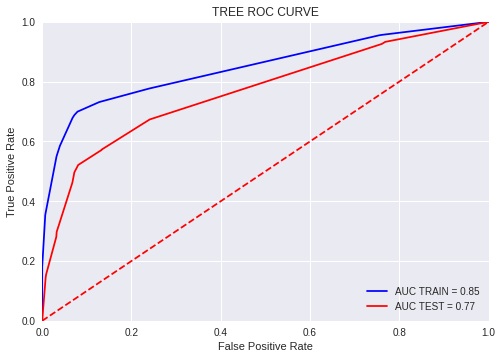

In [595]:
# printing ROC curve using matplotlib for training and test data 
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RECEIVER OPERATING CHARACTERISTICS (ROC) CURVE

* ROC curve plots the values of sensitivity (TPR) against one minus specificity (FPR), at different classification thresholds.
* Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 
* A model with high discrimination ability will have high sensitivity and specificity simultaneously, leading to an ROC curve near the top left corner of the plot. 
* A model with no discrimination ability will have an ROC curve near the 45-degree diagonal line.
* ROC curve usefulness:
  * The curves of different models can be compared 
  * The area under the curve (AUC) can be used as a summary 
  * The shape of the curve shows the expected false positive rate and the false negative rate.
* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.
* When we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive).
* A good model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average - curves are up to the top left corner of the plot.
* A failed model cannot discriminate between the classes (has an AUC of 0.5, no better than a coin flipped) and would predict a random class or a constant class in all cases. 
* For a final model, we may choose a threshold that gives a desirable balance between the false positives and false negatives



Area under the ROC curve 
* Summary of the discrimination ability of a model 
* AUC ranges from 1, corresponding to perfect discrimination, to 0.5, corresponding to a model with no discrimination ability. 




* The ROC in the figure has a high AUC.
* There is a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. 
* According to our business needs, we look for a high TPR and low FPR 
* The threshold corresponding to that point can be said to be the best threshold value. 
* The diagonal line represents the values where the true positive rate is equal to the false positive rate. 
* The blue line represents the ROC curve for the training data set and its AUC is 94%.
* The red line represents the ROC curve for the test training set and its AUC is 89%.
* The values of test data and the training are similar.

In [596]:
feature_cols = list(x.columns.values) 
tree.export_graphviz(my_tree, out_file = 'BANK1.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['YES', 'NO'])

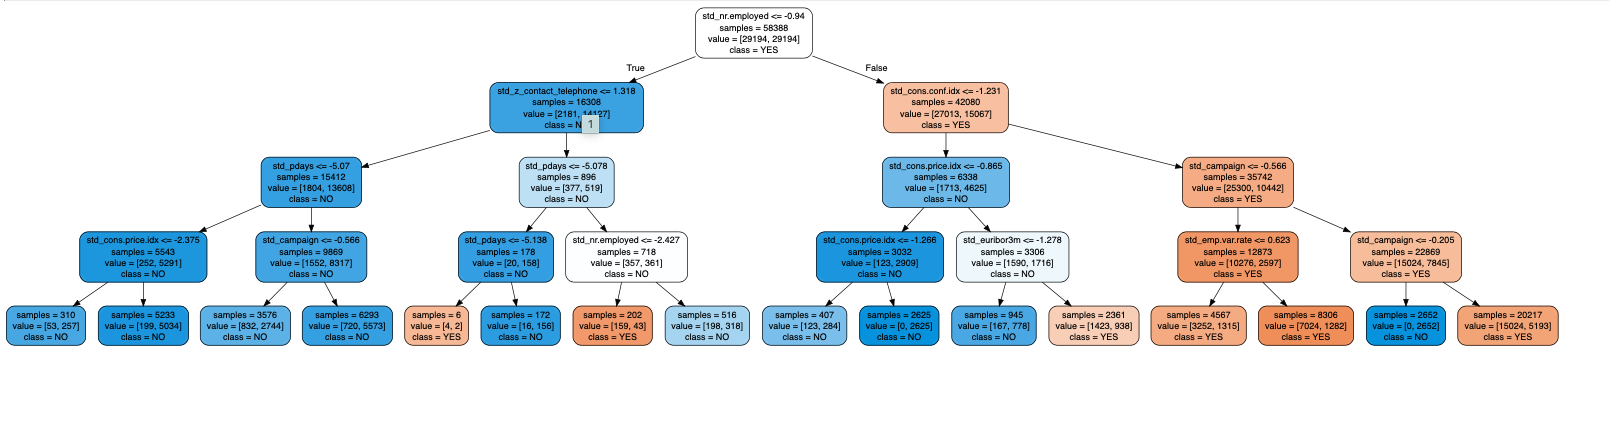

In [597]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [598]:
vars_tree_flag = getTreeVars( my_tree, feature_cols )

In [599]:
for i in vars_tree_flag:
    print(i)

std_campaign
std_pdays
std_emp.var.rate
std_cons.price.idx
std_cons.conf.idx
std_euribor3m
std_nr.employed
std_z_contact_telephone


These are the only variables that will be used and are predictive of 
deposit subscription.

# Random Forest

In [600]:
# creating tree search function for Random Forest
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key = itemgetter(1),reverse = True)
    return theList

In [601]:
# random forest classifier with respect to TARGET; 100 decision trees; random starting state to get the same results
my_RF = RandomForestClassifier( n_estimators = 100, random_state = 1 )
my_RF = my_RF.fit(x_train, y_train[ TARGET] )

In [602]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the RF model based on the training data set is ',metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the RF model based on the test data set is',metrics.accuracy_score(y_test[TARGET], y_Pred_test))

The accuracy of the RF model based on the training data set is  0.8102178529834898
The accuracy of the RF model based on the test data set is 0.8761233908185572


In [603]:
# scoring the predictions (client subscribes or not)
y_Pred_train = my_RF.predict(x_train)
y_Pred_test = my_RF.predict(x_test)

# Confusion Matrix RF

In [604]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6933,407,7340
1,565,329,894
All,7498,736,8234


# Classification Report RF

In [605]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7340
           1       0.45      0.37      0.40       894

    accuracy                           0.88      8234
   macro avg       0.69      0.66      0.67      8234
weighted avg       0.87      0.88      0.88      8234



In [606]:
probs = my_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [607]:
# saving variables for final comparison 
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [608]:
feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars(my_RF, feature_cols )

In [609]:
# printing the variables that are the most important
for i in vars_RF_flag :
   print( i )

('std_euribor3m', 100)
('std_campaign', 70)
('std_age', 58)
('std_cons.conf.idx', 46)
('std_cons.price.idx', 40)
('std_emp.var.rate', 39)
('std_nr.employed', 33)
('std_z_default_no', 24)


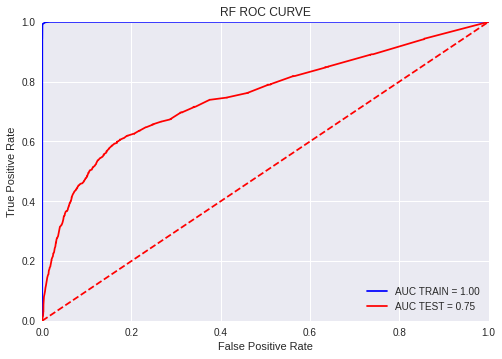

In [610]:
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [611]:
# creating gradient boosting classifier with respect to TARGET
my_GB = GradientBoostingClassifier( random_state = 1 )
my_GB = my_GB.fit( x_train, y_train[ TARGET ] )

In [612]:
# predicting the training and test data sets
y_Pred_train = my_GB.predict(x_train)
y_Pred_test = my_GB.predict(x_test)

In [613]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the GB model based on the training data set is:', metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the GB model based on the testing data set is:', metrics.accuracy_score(y_test[TARGET], y_Pred_test))

The accuracy of the GB model based on the training data set is: 0.8950126738370898
The accuracy of the GB model based on the testing data set is: 0.8847461743988341


# Confusion Matrix GB

In [614]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6833,507,7340
1,442,452,894
All,7275,959,8234


# Classification Report XGB

In [615]:
print(classification_report(y_test[TARGET], y_Pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7340
           1       0.47      0.51      0.49       894

    accuracy                           0.88      8234
   macro avg       0.71      0.72      0.71      8234
weighted avg       0.89      0.88      0.89      8234



# ROC curve GB

In [616]:
probs = my_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [617]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_GB_flag = getEnsembleTreeVars( my_GB, feature_cols )

for i in vars_GB_flag:
    print(i)

('std_nr.employed', 100)
('std_campaign', 88)
('std_cons.conf.idx', 35)
('std_z_default_no', 13)
('std_euribor3m', 11)
('std_cons.price.idx', 8)


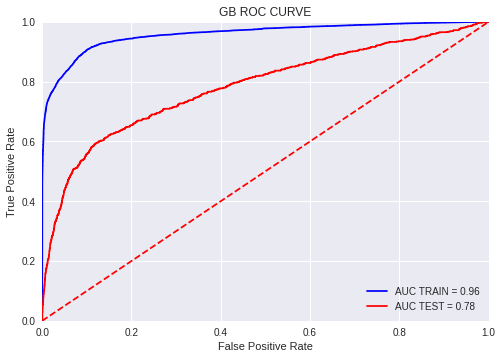

In [618]:
# creating ROC curve 
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Extreme Gradient Boosting 

In [619]:
# creating gradient boosting classifier with respect to TARGET
my_XGB = XGBClassifier( random_state=1)
my_XGB = my_XGB.fit(x_train, y_train[TARGET])

In [620]:
# predicting the training and test data sets
y_Pred_train = my_XGB.predict(x_train)
y_Pred_test = my_XGB.predict(x_test)

In [621]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the XGB model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the XGB model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the XGB model based on the training data set is  0.8929574570117147
The accuracy of the XGB model based on the test data set is  0.8820743259655088


# Confusion Matrix XGB

In [622]:
confusion_matrix(y_test[TARGET], y_Pred_test)
pd.crosstab(y_test[TARGET], y_Pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6820,520,7340
1,451,443,894
All,7271,963,8234


# Classification Report XGB

In [623]:
# creating the ROC curve
probs = my_XGB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = my_XGB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [624]:
# saving the variables for final comparison
fpr_XGB = fpr_test
tpr_XGB = tpr_test
auc_XGB = roc_auc_test

In [625]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_XGB_flag = getEnsembleTreeVars( my_XGB, feature_cols )

for i in vars_XGB_flag:
    print(i)

('std_nr.employed', 100)
('std_z_default_no', 56)
('std_campaign', 52)
('std_cons.conf.idx', 51)
('std_z_housing_no', 47)
('std_z_edu_new_post_high', 34)
('std_z_edu_new_high', 26)
('std_z_job_new_white_collar', 26)
('std_cons.price.idx', 25)
('std_z_contact_cellular', 23)
('std_z_marital_single', 21)


# ROC curve XGB

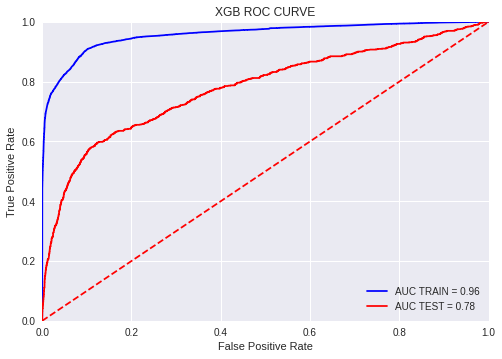

In [626]:
plt.title('XGB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   

# Models' ROC Curve Comparison

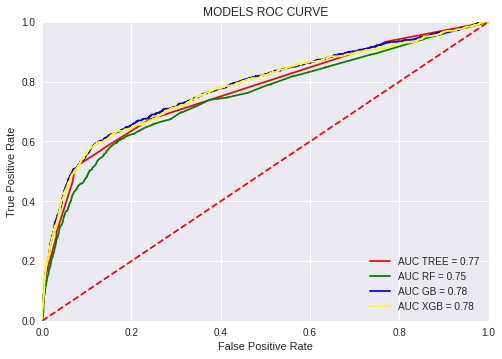

In [627]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color = 'red')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color = 'green')
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color = 'blue')
plt.plot(fpr_XGB, tpr_XGB, 'b', label = 'AUC XGB = %0.2f' % auc_XGB, color = 'yellow')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()